# The AWRA-L model

   1. Model description
     - 1.1 AWRA-L: A gridded landcape water balance model
     - 1.2 Conceptual structure
     - 1.3 AWRA-L calibration 
     - 1.4 AWRA-L benchmarking
   2. AWRACMS Model code location and concepts
   

     


# 1. Model description
## 1.1 AWRA-L: A gridded landcape water balance model


![title](http://www.bom.gov.au/water/landscape/images/allFluxes.09603340.png)

 - Developed by CSIRO for BoM's Water Resource Assessment and Accounting purposes http://www.bom.gov.au/water/waterassessments/
 - Used in http://www.bom.gov.au/water/landscape and elsewhere

### Documentation: 
 - **Original v0.5 model parameterisation** described in: 
    - Van Dijk, A. 2010. The Australian Water Resources Assessment System. Landscape Model (version 0.5). Technical Report 3. CSIRO. Australia.  http://www.bom.gov.au/water/landscape/static/publications/Van_Dijk_AWRA05_TechReport3.pdf
 - **AWRA-L v5.0 model parameterisation**:
     - Viney, N, Vaze J, Crosbie R, Wang B, Dawes W and Frost A (2015) AWRA-L v5.0: technical description of model algorithms and inputs. CSIRO, Australia. http://www.bom.gov.au/water/landscape/static/publications/Viney_et_al_2015_AWRA_L_5.0_model_description.pdf
 - **[BoM Model description report]**: 
     - Frost, A. J., Ramchurn, A., and Smith, A. 2016b. The Bureau’s Operational AWRA Landscape (AWRA-L) Model. Bureau of Meteorology Technical Report. http://www.bom.gov.au/water/landscape/static/publications/Frost__Model_Description_Report.pdf
 - **[BoM model benchmarking report]**:
     - Frost, A. J., Ramchurn, A., Hafeez, M. 2016a. Evaluation of the Bureau’s Operational AWRA-L Model. Bureau of Meteorology Technical Report. http://www.bom.gov.au/water/landscape/static/publications/Frost_Evaluation_Report.pdf
     
## 1.2 Conceptual structure

### 1.2.a.  Hydrological Response Units (HRUs)
  - 2 hydrological response units weighted by proportion of each vegetation class within the cell
     - deep rooted vegetation (trees)
     - shallow rooted vegetation (grass)

![title](HRU_proportions.png)

Figure 4. from [BoM Model description report]


[BoM Model description report]: http://www.bom.gov.au/water/landscape/static/publications/Frost__Model_Description_Report.pdf 
[BoM model benchmarking report]: http://www.bom.gov.au/water/landscape/static/publications/Frost_Evaluation_Report.pdf

###  1.2.b.  Conceptual components

#### AWRA-L conceptual structure diagram 
 - Inputs/outputs:
    - Purple: climate inputs
    - Red: water flux outputs
 - Model components:
    - Blue: water balance 
    - Brown: energy balance 
    - Green: vegetation
    - Dotted line indicates HRU processes.
 
![title](AWRALConceptualDiagram.PNG)
**Figure 2 from Model Descripton report**. 



### Water balance (for each HRU)

#### Includes the following processes:
   - interception
   - infiltration and soil drainage
   - runoff generation (including saturated overland, interflow and baseflow), and 
   - evapotranspiration.

See [BoM Model description report]: Chapter 2 Water Balance for further details.

![title](AWRAL_Hydrological Processes.PNG)


  
###  Energy balance
####           Determines energy available for vapour fluxes through potential evaporation (E0) estimation

   - (a) Calculate energy balance (net radiation)
    
          Net radiation = 
                Incoming shortwave radiation 
              - Reflected outgoing shortwave 
              + Incoming longwave
              - outgoing terrestrial radiation
   - (b) Calculate Potential Evaporation (E0) using net radiation
    
See [BoM Model description report]: Chapter 3 Vapour fluxes and the energy balance for further details.


###  Vegetation

Vegetation density modulates various components of AWRA-L including E0 through albedo, interception, transpiration. 

Vegetation mass is constrained by mass balance and is modelled according to an equilibrium model where:

      maximum transpiration rate = maximum root water uptake

See [BoM Model description report]: Chapter 4 Vegetation Phenology for further details. 
[BoM Model description report]: http://www.bom.gov.au/water/landscape/static/publications/Frost__Model_Description_Report.pdf 


###  1.2.c. Inputs and outputs
   - Inputs:
      - ***Climate data***: Precipitation, solar radiation, temperature, (wind, vapour pressure) 
      - ***Static spatial grids***: slope, DEMs (Hypsometric curves), vegetation height, drainage properties etc
   - Outputs
      - ***Water balance fluxes***: runoff (overland flow, interflow, baseflow), evapotranspiration (AET and PET), deep drainage
      - ***Water balance states*** : soil moisture for different layers, groundwater storage
      - ***Other internal variables***: eg. vegetation mass
  

## 1.3 AWRA-L calibration:

The current version of AWRA uses a **global** set of parameters which are optimised simultaneously to all calibration catchments (~300). 

This means that the same set of parameters are used across all of Australia, and spatial differences in the water balance are a function of the spatial inputs. 

   - uses streamflow data covering 1971 - 2012 for specific set of 'unimpaired' 295 catchments
       - see list of calibration catchments here [Training\test_data\benchmarking\cal.ids.295.csv]
       
[Training\test_data\benchmarking\cal.ids.295.csv]: ..\test_data\benchmarking\cal.ids.295.csv

   - parameters spatially modulated according to static input grids
   
### AWRA-L calibration and validation catchment locations

Streamflow and catchment boundary dataset described in:

   - Zhang, Y. Q., Viney, N., Frost, A., Oke, A., Brooks, M., Chen, Y. and Campbell, N. (2013) Collation of streamflow and catchment attribute dataset for 780 unregulated Australian catchments. Report. CSIRO: Water for a Healthy Country National Research Flagship. http://www.bom.gov.au/water/landscape/static/publications/Zhang_etal_2013_Calibration_Catchments.pdf

#### AWRA-L Unimpaired Calibration and Validation catchments 
![title](AWRAL_cal_val_catchment_locations.png)       



##### View default v5 parameter set  from DEFAULT_PARAMETER_FILE
Stored in json file (https://en.wikipedia.org/wiki/JSON) at awral.settings.DEFAULT_PARAMETER_FILE

In [29]:
### view all parameters
## some are fixed, others are optimised, default parameter bounds are also specified
from awrams.models import awral # load awra model that points to default parameter file
import json
import pandas as pd
model_paramset = json.load(open(awral.settings.DEFAULT_PARAMETER_FILE,'r'))
param_df = pd.DataFrame(model_paramset)
param_df

,DecimalPlaces,DisplayName,Fixed,Max,MemberName,Min,Value
0,0,HRU:DR Dry Soil Albedo,True,0.50,alb_dry_hruDR,0.100,0.260000
1,0,HRU:SR Dry Soil Albedo,True,0.50,alb_dry_hruSR,0.100,0.260000
2,0,HRU:DR Wet Soil Albedo,True,0.50,alb_wet_hruDR,0.100,0.160000
3,0,HRU:SR Wet Soil Albedo,True,0.50,alb_wet_hruSR,0.100,0.160000
4,0,HRU:DR Conversion Coefficient From Vegetation ...,False,0.05,cGsmax_hruDR,0.020,0.032005
5,0,HRU:SR Conversion Coefficient From Vegetation ...,False,0.05,cGsmax_hruSR,0.020,0.023711
6,0,HRU:DR Ratio of Average Evaporation Rate Over ...,False,0.25,ER_frac_ref_hruDR,0.040,0.073556
7,0,HRU:DR Soil Evaporation Scaling Factor When So...,False,1.00,FsoilEmax_hruDR,0.200,0.227466
8,0,HRU:SR Soil Evaporation Scaling Factor When So...,False,1.00,FsoilEmax_hruSR,0.200,0.929708
9,0,HRU:DR Reference Soil Cover Fraction That Dete...,True,0.25,fvegref_G_hruDR,0.100,0.150000


In [35]:
# how many parameters are there in total to potentially optimise?
len(param_df)

53

In [36]:
# count the number of fixed parameters
sum(param_df['Fixed']==True)

32

In [37]:
# count the number of optimised parameters
sum(param_df['Fixed']==False)

21

### Spatial maps modulated by model parameters

In [38]:
# look at a particular parameter K0sat_scale
param_df[param_df['MemberName']=='K0sat_scale']

,DecimalPlaces,DisplayName,Fixed,Max,MemberName,Min,Value
17,0,Scale for saturated hydraulic conductivity sur...,False,10.0,K0sat_scale,0.1,2.872808


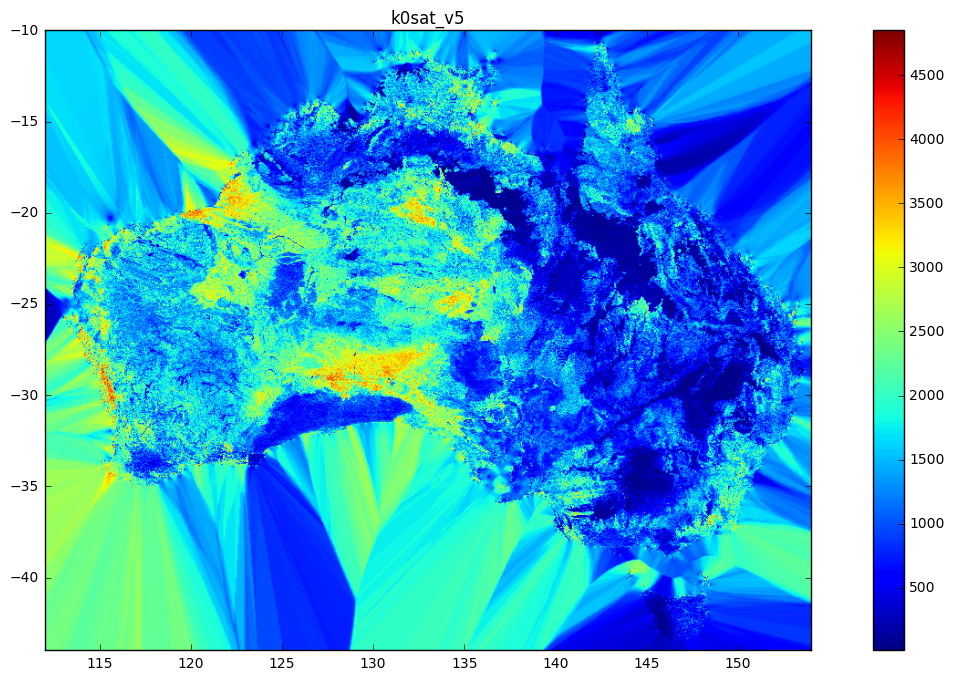

In [39]:
# view a chosen spatial grid parameter
import h5py
filename = '../../models/awrams/models/awral/data/spatial_parameters.h5'
# open a connections to h5 file
h = h5py.File(filename, 'r')

# plot soil drainage parameter
parname='k0sat_v5'
import matplotlib.pyplot as plt
# magic command for inline plotting
%matplotlib inline 
lats=list(h['dimensions']['latitude'])
lons=list(h['dimensions']['longitude'])
plt.figure(figsize=(16,8))  # alter the size of the output figure in inches
plt.imshow(h['parameters'][parname],extent=[min(lons),max(lons),min(lats),max(lats)])  # extent= scalars (left, right, bottom, top)
plt.colorbar()
plt.title(parname)
h.close()

### Calibration approach
 - The **Shuffled-Complex evolution (SCE)** algorithm of Duan et al (1993) is used for finding and optimum parameter set 
     - Duan, Q.Y., Gupta, V.K. & Sorooshian, S. J Optim Theory Appl (1993) 76: 501. https://doi.org/10.1007/BF00939380
 - Individual cell water balances are calculated over the entire period (including a warm up simulation period) and cell values are combined to give catchment total runoff values 
 - Total catchment runoff values are then compared to the observed streamflow through summary statistics such as Nash-Sutcliffe Efficiency:
   - https://en.wikipedia.org/wiki/Nash%E2%80%93Sutcliffe_model_efficiency_coefficient
 - These statistics are calculated for all catchments / points used in calibration using the same set of input parameters  
 - Optimisation requires specification of a **global objective function** that collates catchment or point based **local  objective** function values

 - Parallel computation using MPI is used to facilitate fast evaluation/experimentation

### Objective function - Currently uses catchment based runoff, soil moisture and ET

  - ***Individual site objective function*** (TestLocalMulti in [test_objectives.py]) uses a weighted:
      - Nash-Sutcliffe Efficiency and relative bias for runoff
      - Correlation for satellite based soil moisture and ET
      - individual site statistics defined  in [objectives.py]
  - ***Global objective function*** (GlobalMultiEval in [test_objectives.py]) combines individual site values into single objective function
      - average of ranked site objective functions for 25%, 50%, 75 and 100% values
      
[test_objectives.py]:../../../edit/calibration/awrams/calibration/objectives/test_objectives.py
[objectives.py]:../../../edit/calibration/awrams/calibration/objectives/objectives.py      

In [ ]:
# view the individual site objective file
# %load ../../calibration/awrams/calibration/objectives/objectives.py

In [10]:
# view the individual site objective file
# %load ../../calibration/awrams/calibration/objectives/test_objectives.py

For further details see the **[BoM Model description report]: Chapter 5 Parameterisation**.

**Development of the objective functions** are described in:

 - Viney, N.R., Perraud, J., Vaze, J., Chiew, F.H.S., Post, D.A. and Yang, A., 2009. The usefulness of bias constraints in model calibration for regionalisation to ungauged catchments. 18th World IMACS / MODSIM Congress. Modelling andSimulation Society of Australia and New Zealand and International Association for Mathematics and Computers in Simulation, Cairns, Australia, pp. 3421-3427, http://www.mssanz.org.au/modsim09/I7/viney_I7a.pdf.

 - Zhang, Y.Q., Viney, N.R., Chiew, F.H.S., van Dijk A.I.J.M, and Liu, Y., 2011. Improving hydrological and vegetation modelling using regional model calibration schemes together with remote sensing data, 19th World IMACS / MODSIM Congress.: Interfacing Modelling and Simulation with Mathematical and Computational Sciences, pp. 3448-3454. https://www.mssanz.org.au/modsim2011/I4/zhang.pdf

 - Zhang, Y.Q and Viney, N. 2012. Toward optimum multiple objective model calibrations for AWRA-L model. CSIRO: Water for a Healthy Country National Research Flagship, 18pp.  https://publications.csiro.au/rpr/download?pid=csiro:EP125044&dsid=DS1
 
**Sensitivity analysis undertaken on AWRA-L v0.5**:  

- Peeters, Luk, Crosbie, Russell, Doble, Rebecca and  Van Dijk, Albert, 2012. AWRA-L: subsurface parameterisation, sensitivity analysis and calibration targets. Australia: CSIRO Water for a Healthy Country. csiro:EP125038. https://doi.org/10.4225/08/5852dcf6023a9. https://publications.csiro.au/rpr/download?pid=csiro:EP125038&dsid=DS3



[BoM Model description report]: http://www.bom.gov.au/water/landscape/static/publications/Frost__Model_Description_Report.pdf 




## 1.4 AWRA-L benchmarking and comparative performance

**Benchmarking**: Test the model against observational datasets and compare performance against other models

### BoM model evaluation/benchmarking report

A comparison of AWRA-L v5 versus other national models (CABLE, WaterDyn) and locally calibrated rainfall-runoff models (eg. GR4J).

#### Frost, A. J., Ramchurn, A., Hafeez, M. 2016a. Evaluation of the Bureau’s Operational AWRA-L Model. Bureau of Meteorology Technical Report. http://www.bom.gov.au/water/landscape/static/publications/Frost_Evaluation_Report.pdf


#### Datasets used: 

  - **Unimpaired catchments**:  see plot of catchments above
  
     - **Streamflow**:
         - see q_obs.csv in [AWRA CMS test data - calibration folder] - subset of 4 catchments for testing
         - see Catchment_Qobs.csv in [AWRA CMS training data - calibration folder] - all catchments (only supplied in training) 
     - **Satellite based AET estimate**
         - CMRSET - MODIS based estimate of Actual ET averaged over the catchment at monthly timescale
         - Guerschman, J.P., Van Dijk, A.I.J.M., Mattersdorf, G., Beringer, J., Hutley, L.B., Leuning, R., Pipunic, R.C. and Sherman, B.S., 2009. Scaling of potential evapotranspiration with MODIS data reproduces flux observations and catchment water balance observations across Australia. Journal of Hydrology, 369(1-2): 107-119. https://doi.org/10.1016/j.jhydrol.2009.02.013
         - see:
             - cmrset_obs.csv in [AWRA CMS test data - calibration folder], and
             - Catchments_ET_CMRS.csv in [AWRA CMS training data - calibration folder] (only supplied in training)
             
     - **Satellite based soil moisture**:
        - Owe, M., R. de Jeu, and T. Holmes (2008), Multisensor historical climatology of satellite-derived global land surface moisture, J. Geophys. Res., 113, F01002, https://doi.org/10.1029/2007JF000769.
         - see: 
            - sm_amsre_obs.csv in [AWRA CMS test data - calibration folder]
            - Catchments_SM_AMSRE.csv in [AWRA CMS training data - calibration folder] (only supplied in training)
            
  - **Point based** datasets:
     - **Soil moisture**: Profile 0-90cm   
         - ***OzNet***  - An Australian monitoring network for soil moisture and micrometeorology (Murrumbidgee) 
             - http://www.oznet.org.au/murrumbidgeesm.html
             - Smith, A. B., J. P.Walker, A. W.Western, R. I.Young, K. M.Ellett, R. C.Pipunic, R. B.Grayson, L.Siriwardena, F. H. S.Chiew, and H.Richter (2012), The Murrumbidgee soil moisture monitoring network data set, Water Resour. Res., 48, W07701, https://doi.org/10.1029/2012WR011976.
                 - see [Oznet data folder] containing benchmarking data 
                 
       - ***SASMAS*** - Scaling and Assimilation of Soil Moisture and Streamflow (Goulburn Catchment, Upper Hunter
            - http://www.eng.newcastle.edu.au/sasmas/SASMAS/sasdata.html
            - Rüdiger, C., G. Hancock, H. M. Hemakumara, B. Jacobs, J. D. Kalma, C. Martinez, M. Thyer, J. P. Walker, T. Wells, and G. R. Willgoose (2007), Goulburn River experimental catchment data set, Water Resour. Res., 43, W10403, https://doi.org/10.1029/2006WR005837.
                 - see [SASMAS data folder] containing benchmarking data 
                 
     - **Evapotranspiration from flux towers: Ozflux **: AET estimates from acorss Australia
         - Dingo Ozflux dataset 
         - Beringer, J., Hutley, L. B., McHugh, I., Arndt, S. K., Campbell, D., Cleugh, H. A., Cleverly, J., Resco de Dios, V., Eamus, D., Evans, B., Ewenz, C., Grace, P., Griebel, A., Haverd, V., Hinko-Najera, N., Huete, A., Isaac, P., Kanniah, K., Leuning, R., Liddell, M. J., Macfarlane, C., Meyer, W., Moore, C., Pendall, E., Phillips, A., Phillips, R. L., Prober, S. M., Restrepo-Coupe, N., Rutledge, S., Schroder, I., Silberstein, R., Southall, P., Yee, M. S., Tapper, N. J., van Gorsel, E., Vote, C., Walker, J., and Wardlaw, T.: An introduction to the Australian and New Zealand flux tower network – OzFlux, Biogeosciences, 13, 5895-5916, https://doi.org/10.5194/bg-13-5895-2016, 2016.
	     - Beringer, J., McHugh, I., Hutley, L. B., Isaac, P., and Kljun, N.: Technical note: Dynamic INtegrated Gap-filling and partitioning for OzFlux (DINGO), Biogeosciences, 14, 1457-1460, https://doi.org/10.5194/bg-14-1457-2017, 2017.
         - see [OzFlux data folder] containing benchmarking data 
     
             
             
[AWRA CMS test data - calibration folder]: ../../test_data/calibration 
[AWRA CMS training data - calibration folder]:../../Training/test_data/calibration 
[SASMAS data folder]:../../test_data/benchmarking/sasmas                            
[Oznet data folder]:../../test_data/benchmarking/oznet
[OzFlux data folder]:../../test_data/benchmarking/ozflux

  
#### SASMAS, OzNet and Dingo point dataset locations

![title](OzFlux_tower_OzNetSASMAS_Catchment_locations.png)



### Runoff
 - Performs well compared to similar national gridded models (WaterDyn, CABLE) predominantly due to calibration
 - Performs well in validation compared to locally-calibrated nearest-neirbour regionalised models (e.g. GR4J)

![title](Monthly_streamflow_NSE.png)

Figure 11 from [BoM model benchmarking report].
[BoM model benchmarking report]: http://www.bom.gov.au/water/landscape/static/publications/Frost_Evaluation_Report.pdf 

### Profile soil moisture (0-90cm)

 - Performs as well as similar nationial gridded models (WaterDyn, CABLE) 

####  Monthly correlation with AWRA-L simulation from Oznet Murrumbidgee probe data
    
![title](Oznet_correlation_profile_map.png)

Figure 16(a) from [BoM model benchmarking report].
[BoM model benchmarking report]: http://www.bom.gov.au/water/landscape/static/publications/Frost_Evaluation_Report.pdf 

### Benchmark statistics

#### Various statistics computed by default  (see [benchmarking/stats.py])

  - mean, variance, bias, relative bias, rmse, correlation (pearsons_r), nash-sutcliffe efficiency (nse), regression coefficients (slope, intercept, R-squared), Viney's grand objective function (fobj) 

[benchmarking/stats.py]: ../../../edit/benchmarking/awrams/benchmarking/stats.py

#### Benchmark your results to those from AWRA-L version 5 


  - AWRA-L v5 simulations provided for comparison purposes:
     - eg. [AWRA-L top layer soil moisture s0 at Oznet locations]: 
     
             see ../../test_data/benchmarking/oznet/awral_s0_avg.csv
     
[AWRA-L top layer soil moisture s0 at Oznet locations]:../../test_data/benchmarking/oznet/awral_s0_avg.csv     
     

  - AWRA-L v5 benchmark summary statistics detailed in Table 10 [BoM model benchmarking report]  
[BoM model benchmarking report]: http://www.bom.gov.au/water/landscape/static/publications/Frost_Evaluation_Report.pdf  


![title](Table10BenchmarkReport.PNG)


  

In [12]:
import pandas as pd
qobs=pd.read_csv('../../test_data/benchmarking/runoff/q_obs.csv')
qobs.head()

,Unnamed: 0,4508,5115,105001,107002,108003,109001,111101,112102,113004,116008
0,1974-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1974-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1974-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1974-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1974-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


!ls ../../Training/test_data/benchmarking/runoff

In [6]:
# read the runoff data - notice there are 787 columns... complete Zhang dataset
import pandas as pd
qobs2=pd.read_csv('../../Training/test_data/benchmarking/runoff/Catchment_Qobs.csv')
qobs2.head()

,Unnamed: 0,120216,145003,206020,119003,121003,125005,130302,130404,136101,...,407220,422394,424201,239531,811004,814040,903250,239523,136203,410734
0,1974-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1974-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1974-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1974-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1974-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


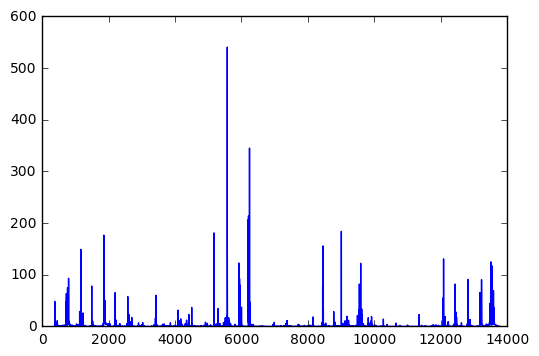

In [13]:
# plot the timeseries for a particular site
plt.plot(qobs2['120216'])

## Now onto ....

#### [1.2 Understanding the AWRA Community Modelling System package and its modules]
[1.2 Understanding the AWRA Community Modelling System package and its modules]: 1.2_Understanding_the_AWRA_Community_Modelling_System_package_and_its_modules.ipynb